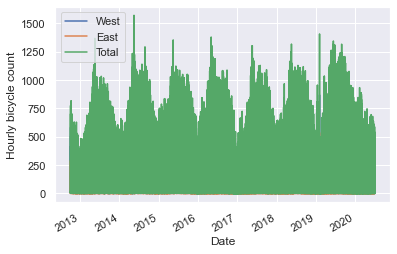

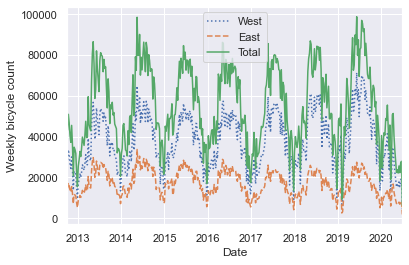

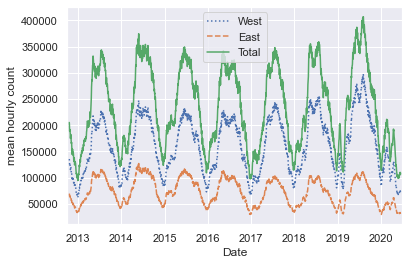

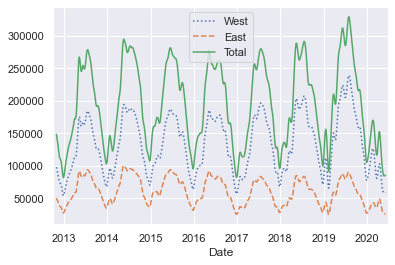

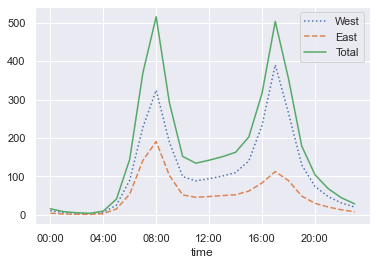

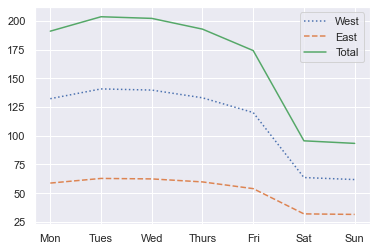

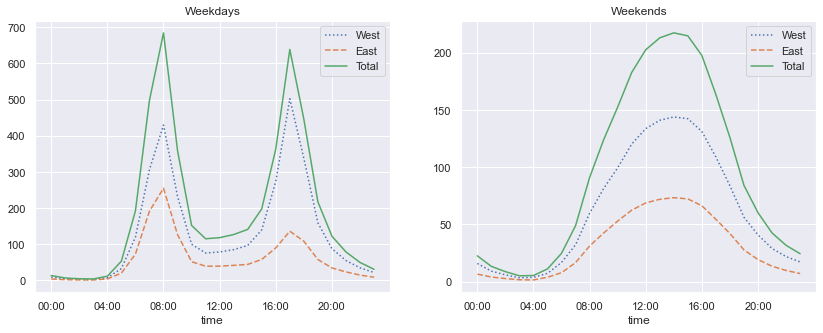

In [32]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data = pd.read_csv("C:\\FremontBridge.csv", index_col='Date', parse_dates=True)
data.head()


data.columns =['West', 'East', 'Total']
data['Total'] = data.eval('West + East')

#statistics
data.dropna().describe()

#visualization
data.plot()
plt.ylabel('Hourly bicycle count')

# weekly
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

#daily 30 days rolling_mean

daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

#Gaussian window
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

#idea of the general trend - average traffic on the time of day

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 *np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
# -> bimodal distribution

# by day
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

#weekend vs weekdays
weekend = np.where(data.index.weekday <5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-']);